### <center> Store sales dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('./Store Sales.csv',parse_dates=['Order Date','Ship Date'])
data.head(10)
data.rename(columns={'Order Date':'Order_Date','Ship Date':'Ship_date','Ship Mode':'Ship_Mode','Product Name':'Product_Name'},inplace=True)
data.sort_values(by='Order_Date',inplace=True)
data.sort_values(by='Ship_date',inplace=True)
data.head(10)

,Row ID,Order ID,Order_Date,Ship_date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product_Name,Sales
2432,2433,CA-2015-148586,2015-03-25,2015-01-04,Standard Class,AZ-10750,Annie Zypern,Consumer,United States,New York City,New York,10009.0,East,FUR-CH-10002439,Furniture,Chairs,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",366.786
8463,8464,CA-2015-100881,2015-03-28,2015-01-04,Standard Class,DR-12940,Daniel Raglin,Home Office,United States,Albuquerque,New Mexico,87105.0,West,TEC-PH-10003273,Technology,Phones,AT&T TR1909W,302.376
7631,7632,CA-2015-162089,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",127.302
7629,7630,CA-2015-162089,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,OFF-EN-10002230,Office Supplies,Envelopes,Airmail Envelopes,335.720
7630,7631,CA-2015-162089,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,TEC-PH-10001819,Technology,Phones,Innergie mMini Combo Duo USB Travel Charging Kit,251.944
2891,2892,CA-2015-142727,2015-04-29,2015-01-05,Second Class,HG-14845,Harry Greene,Consumer,United States,Lake Charles,Louisiana,70601.0,South,OFF-BI-10000136,Office Supplies,Binders,Avery Non-Stick Heavy Duty View Round Locking ...,17.940
2890,2891,CA-2015-142727,2015-04-29,2015-01-05,Second Class,HG-14845,Harry Greene,Consumer,United States,Lake Charles,Louisiana,70601.0,South,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",51.960
7859,7860,CA-2015-103429,2015-05-30,2015-01-06,First Class,LW-16825,Laurel Workman,Corporate,United States,New York City,New York,10024.0,East,OFF-PA-10001712,Office Supplies,Paper,Xerox 1948,39.960
7856,7857,CA-2015-103429,2015-05-30,2015-01-06,First Class,LW-16825,Laurel Workman,Corporate,United States,New York City,New York,10024.0,East,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",25.584
7858,7859,CA-2015-103429,2015-05-30,2015-01-06,First Class,LW-16825,Laurel Workman,Corporate,United States,New York City,New York,10024.0,East,OFF-AP-10001005,Office Supplies,Appliances,Honeywell Quietcare HEPA Air Cleaner,235.950


In [3]:
data.tail(10)

,Row ID,Order ID,Order_Date,Ship_date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product_Name,Sales
1296,1297,CA-2018-115427,2018-12-30,2019-03-01,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904
4287,4288,CA-2018-127516,2018-12-28,2019-03-01,Standard Class,EH-14005,Erica Hernandez,Home Office,United States,Nashville,Tennessee,37211.0,South,OFF-ST-10000736,Office Supplies,Storage,Carina Double Wide Media Storage Towers in Nat...,64.784
1297,1298,CA-2018-115427,2018-12-30,2019-03-01,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720
572,573,CA-2018-164826,2018-12-28,2019-04-01,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024.0,East,OFF-BI-10001922,Office Supplies,Binders,Storex Dura Pro Binders,33.264
573,574,CA-2018-164826,2018-12-28,2019-04-01,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024.0,East,TEC-PH-10000347,Technology,Phones,Cush Cases Heavy Duty Rugged Cover Case for Sa...,14.850
571,572,CA-2018-164826,2018-12-28,2019-04-01,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024.0,East,OFF-FA-10000585,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,13.960
570,571,CA-2018-164826,2018-12-28,2019-04-01,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024.0,East,OFF-LA-10001297,Office Supplies,Labels,Avery 473,72.450
4239,4240,CA-2018-158673,2018-12-29,2019-04-01,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Grand Rapids,Michigan,49505.0,Central,OFF-PA-10000994,Office Supplies,Paper,Xerox 1915,209.700
5131,5132,CA-2018-146626,2018-12-29,2019-05-01,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,California,92804.0,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120
645,646,CA-2018-126221,2018-12-30,2019-05-01,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300


In [4]:
data.sample()

,Row ID,Order ID,Order_Date,Ship_date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product_Name,Sales
3383,3384,CA-2016-130659,2016-04-12,2016-09-12,Second Class,MS-17365,Maribeth Schnelling,Consumer,United States,New York City,New York,10035.0,East,FUR-CH-10003535,Furniture,Chairs,"Global Armless Task Chair, Royal Blue",384.174


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 2432 to 645
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order_Date     9800 non-null   datetime64[ns]
 3   Ship_date      9800 non-null   datetime64[ns]
 4   Ship_Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800

In [7]:
data.columns

Index(['Row ID', 'Order ID', 'Order_Date', 'Ship_date', 'Ship_Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product_Name', 'Sales'],
      dtype='object')

In [8]:
data.size

176400

In [9]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [10]:
data.isnull().sum()

Row ID            0
Order ID          0
Order_Date        0
Ship_date         0
Ship_Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product_Name      0
Sales             0
dtype: int64

In [11]:
data.duplicated().sum()

0

In [12]:
data.drop(columns=['Row ID','Order ID'],inplace=True)
data.head(10)

,Order_Date,Ship_date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product_Name,Sales
2432,2015-03-25,2015-01-04,Standard Class,AZ-10750,Annie Zypern,Consumer,United States,New York City,New York,10009.0,East,FUR-CH-10002439,Furniture,Chairs,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",366.786
8463,2015-03-28,2015-01-04,Standard Class,DR-12940,Daniel Raglin,Home Office,United States,Albuquerque,New Mexico,87105.0,West,TEC-PH-10003273,Technology,Phones,AT&T TR1909W,302.376
7631,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",127.302
7629,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,OFF-EN-10002230,Office Supplies,Envelopes,Airmail Envelopes,335.720
7630,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,TEC-PH-10001819,Technology,Phones,Innergie mMini Combo Duo USB Travel Charging Kit,251.944
2891,2015-04-29,2015-01-05,Second Class,HG-14845,Harry Greene,Consumer,United States,Lake Charles,Louisiana,70601.0,South,OFF-BI-10000136,Office Supplies,Binders,Avery Non-Stick Heavy Duty View Round Locking ...,17.940
2890,2015-04-29,2015-01-05,Second Class,HG-14845,Harry Greene,Consumer,United States,Lake Charles,Louisiana,70601.0,South,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",51.960
7859,2015-05-30,2015-01-06,First Class,LW-16825,Laurel Workman,Corporate,United States,New York City,New York,10024.0,East,OFF-PA-10001712,Office Supplies,Paper,Xerox 1948,39.960
7856,2015-05-30,2015-01-06,First Class,LW-16825,Laurel Workman,Corporate,United States,New York City,New York,10024.0,East,OFF-BI-10004233,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",25.584
7858,2015-05-30,2015-01-06,First Class,LW-16825,Laurel Workman,Corporate,United States,New York City,New York,10024.0,East,OFF-AP-10001005,Office Supplies,Appliances,Honeywell Quietcare HEPA Air Cleaner,235.950


In [13]:
data['Shipment_Delay'] = data['Ship_date'] - data['Order_Date'] 
data

,Order_Date,Ship_date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product_Name,Sales,Shipment_Delay
2432,2015-03-25,2015-01-04,Standard Class,AZ-10750,Annie Zypern,Consumer,United States,New York City,New York,10009.0,East,FUR-CH-10002439,Furniture,Chairs,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",366.786,-80 days
8463,2015-03-28,2015-01-04,Standard Class,DR-12940,Daniel Raglin,Home Office,United States,Albuquerque,New Mexico,87105.0,West,TEC-PH-10003273,Technology,Phones,AT&T TR1909W,302.376,-83 days
7631,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",127.302,-85 days
7629,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,OFF-EN-10002230,Office Supplies,Envelopes,Airmail Envelopes,335.720,-85 days
7630,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,TEC-PH-10001819,Technology,Phones,Innergie mMini Combo Duo USB Travel Charging Kit,251.944,-85 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2018-12-28,2019-04-01,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024.0,East,OFF-FA-10000585,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,13.960,94 days
570,2018-12-28,2019-04-01,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024.0,East,OFF-LA-10001297,Office Supplies,Labels,Avery 473,72.450,94 days
4239,2018-12-29,2019-04-01,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Grand Rapids,Michigan,49505.0,Central,OFF-PA-10000994,Office Supplies,Paper,Xerox 1915,209.700,93 days
5131,2018-12-29,2019-05-01,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,California,92804.0,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,123 days


In [14]:
data['Shipment_Delay'] = data.Shipment_Delay.astype('str')

In [15]:
data['Shipment_Delay_1'] = data['Shipment_Delay'].str.replace('\D', "", regex = True)

In [16]:
data

,Order_Date,Ship_date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product_Name,Sales,Shipment_Delay,Shipment_Delay_1
2432,2015-03-25,2015-01-04,Standard Class,AZ-10750,Annie Zypern,Consumer,United States,New York City,New York,10009.0,East,FUR-CH-10002439,Furniture,Chairs,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",366.786,-80 days,80
8463,2015-03-28,2015-01-04,Standard Class,DR-12940,Daniel Raglin,Home Office,United States,Albuquerque,New Mexico,87105.0,West,TEC-PH-10003273,Technology,Phones,AT&T TR1909W,302.376,-83 days,83
7631,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,FUR-CH-10002304,Furniture,Chairs,"Global Stack Chair without Arms, Black",127.302,-85 days,85
7629,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,OFF-EN-10002230,Office Supplies,Envelopes,Airmail Envelopes,335.720,-85 days,85
7630,2015-03-30,2015-01-04,First Class,MP-17470,Mark Packer,Home Office,United States,Brownsville,Texas,78521.0,Central,TEC-PH-10001819,Technology,Phones,Innergie mMini Combo Duo USB Travel Charging Kit,251.944,-85 days,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2018-12-28,2019-04-01,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024.0,East,OFF-FA-10000585,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,13.960,94 days,94
570,2018-12-28,2019-04-01,Standard Class,JF-15415,Jennifer Ferguson,Consumer,United States,New York City,New York,10024.0,East,OFF-LA-10001297,Office Supplies,Labels,Avery 473,72.450,94 days,94
4239,2018-12-29,2019-04-01,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Grand Rapids,Michigan,49505.0,Central,OFF-PA-10000994,Office Supplies,Paper,Xerox 1915,209.700,93 days,93
5131,2018-12-29,2019-05-01,Standard Class,BP-11185,Ben Peterman,Corporate,United States,Anaheim,California,92804.0,West,FUR-FU-10002501,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,123 days,123


In [17]:
data['Shipment_Delay_1'] = data['Shipment_Delay_1'].astype('int')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 2432 to 645
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_Date        9800 non-null   datetime64[ns]
 1   Ship_date         9800 non-null   datetime64[ns]
 2   Ship_Mode         9800 non-null   object        
 3   Customer ID       9800 non-null   object        
 4   Customer Name     9800 non-null   object        
 5   Segment           9800 non-null   object        
 6   Country           9800 non-null   object        
 7   City              9800 non-null   object        
 8   State             9800 non-null   object        
 9   Postal Code       9789 non-null   float64       
 10  Region            9800 non-null   object        
 11  Product ID        9800 non-null   object        
 12  Category          9800 non-null   object        
 13  Sub-Category      9800 non-null   object        
 14  Product_Name      9800

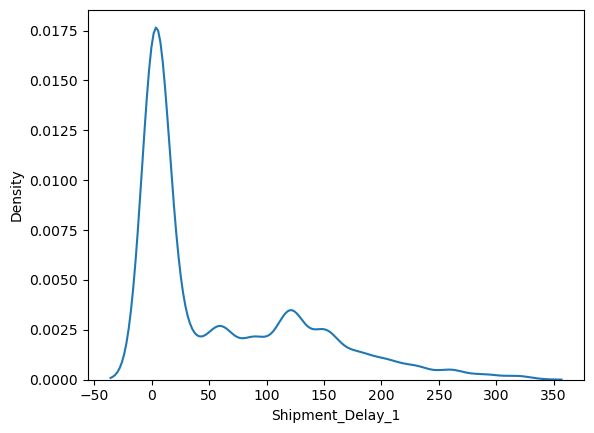

In [19]:
sns.kdeplot(data=data.Shipment_Delay_1)
plt.show()

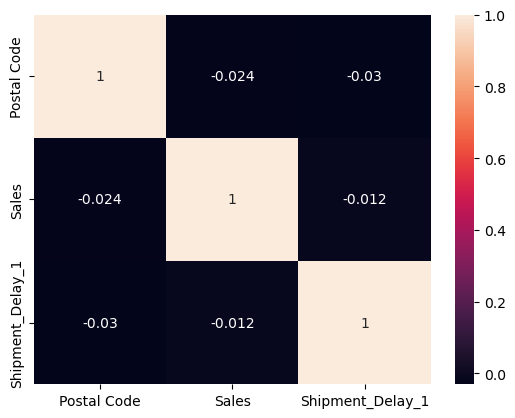

In [20]:
sns.heatmap(data.corr(), annot=True)
plt.show()

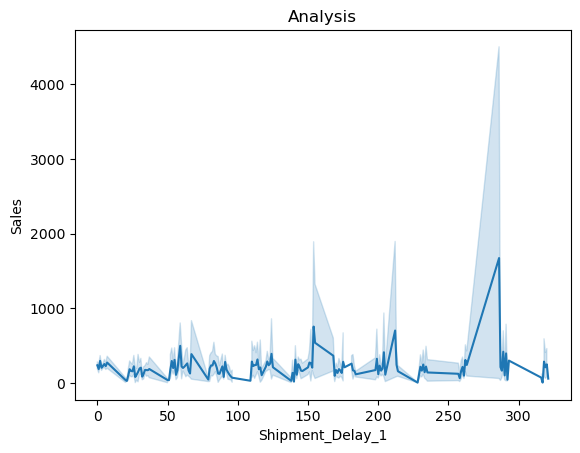

In [21]:
sns.lineplot(x='Shipment_Delay_1',y='Sales',data=data)
plt.title('Analysis')
plt.show()

In [22]:
Shipment_Delay_max=data.query("Shipment_Delay_1>=250 & Shipment_Delay_1<=300")
Shipment_Delay_max

,Order_Date,Ship_date,Ship_Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product_Name,Sales,Shipment_Delay,Shipment_Delay_1
1359,2015-09-26,2015-01-10,Second Class,KT-16465,Kean Takahito,Consumer,United States,Los Angeles,California,90049.0,West,FUR-CH-10002961,Furniture,Chairs,"Leather Task Chair, Black",145.568,-259 days,259
2542,2015-09-26,2015-01-10,Second Class,NB-18580,Nicole Brennan,Corporate,United States,Philadelphia,Pennsylvania,19134.0,East,OFF-AP-10002191,Office Supplies,Appliances,Belkin 8 Outlet SurgeMaster II Gold Surge Prot...,143.952,-259 days,259
5625,2015-09-29,2015-01-10,Second Class,PP-18955,Paul Prost,Home Office,United States,Seattle,Washington,98115.0,West,FUR-FU-10001706,Furniture,Furnishings,Longer-Life Soft White Bulbs,6.160,-262 days,262
5626,2015-09-29,2015-01-10,Second Class,PP-18955,Paul Prost,Home Office,United States,Seattle,Washington,98115.0,West,FUR-TA-10002958,Furniture,Tables,"Bevis Oval Conference Table, Walnut",2348.820,-262 days,262
3313,2015-09-27,2015-01-10,Standard Class,TH-21100,Thea Hendricks,Consumer,United States,San Diego,California,92037.0,West,OFF-PA-10000675,Office Supplies,Paper,Xerox 1919,81.980,-260 days,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,2018-11-29,2018-03-12,Standard Class,TT-21070,Ted Trevino,Consumer,United States,Chattanooga,Tennessee,37421.0,South,FUR-FU-10004017,Furniture,Furnishings,"Executive Impressions 13"" Chairman Wall Clock",101.520,-262 days,262
9288,2018-11-30,2018-03-12,First Class,TB-21625,Trudy Brown,Consumer,United States,Philadelphia,Pennsylvania,19134.0,East,FUR-CH-10003981,Furniture,Chairs,Global Commerce Series Low-Back Swivel/Tilt Ch...,1079.316,-263 days,263
4635,2018-12-03,2018-03-17,Standard Class,BS-11380,Bill Stewart,Corporate,United States,San Francisco,California,94122.0,West,OFF-ST-10000736,Office Supplies,Storage,Carina Double Wide Media Storage Towers in Nat...,242.940,-261 days,261
5386,2018-12-03,2018-03-17,Standard Class,GA-14725,Guy Armstrong,Consumer,United States,Rogers,Arkansas,72756.0,South,OFF-BI-10000829,Office Supplies,Binders,Avery Non-Stick Binders,40.410,-261 days,261


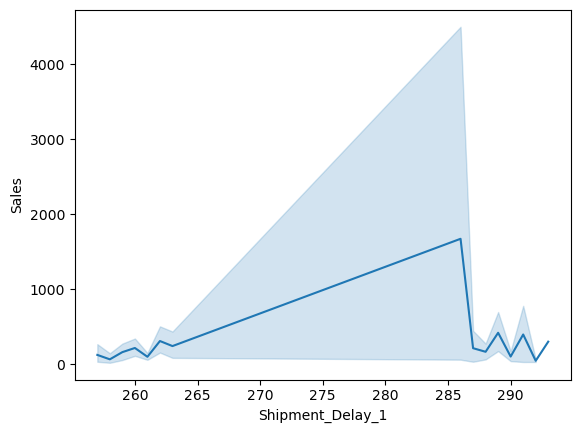

In [23]:
sns.lineplot(data = Shipment_Delay_max, x = 'Shipment_Delay_1',y ='Sales');

In [24]:
data.drop(columns=['Shipment_Delay','Postal Code','Product ID','Customer ID','Customer Name'],inplace=True)
data.head()

,Order_Date,Ship_date,Ship_Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Shipment_Delay_1
2432,2015-03-25,2015-01-04,Standard Class,Consumer,United States,New York City,New York,East,Furniture,Chairs,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",366.786,80
8463,2015-03-28,2015-01-04,Standard Class,Home Office,United States,Albuquerque,New Mexico,West,Technology,Phones,AT&T TR1909W,302.376,83
7631,2015-03-30,2015-01-04,First Class,Home Office,United States,Brownsville,Texas,Central,Furniture,Chairs,"Global Stack Chair without Arms, Black",127.302,85
7629,2015-03-30,2015-01-04,First Class,Home Office,United States,Brownsville,Texas,Central,Office Supplies,Envelopes,Airmail Envelopes,335.720,85
7630,2015-03-30,2015-01-04,First Class,Home Office,United States,Brownsville,Texas,Central,Technology,Phones,Innergie mMini Combo Duo USB Travel Charging Kit,251.944,85


In [25]:
data.columns

Index(['Order_Date', 'Ship_date', 'Ship_Mode', 'Segment', 'Country', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Product_Name', 'Sales',
       'Shipment_Delay_1'],
      dtype='object')

In [26]:
Furniture_sales_East=data.query("Category== 'Furniture' & Region =='East'")
Furniture_sales_East

,Order_Date,Ship_date,Ship_Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Shipment_Delay_1
2432,2015-03-25,2015-01-04,Standard Class,Consumer,United States,New York City,New York,East,Furniture,Chairs,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",366.786,80
5333,2015-08-26,2015-01-09,Standard Class,Consumer,United States,Newark,Delaware,East,Furniture,Furnishings,Acrylic Self-Standing Desk Frames,10.680,229
9427,2015-11-27,2015-01-12,Standard Class,Corporate,United States,Buffalo,New York,East,Furniture,Furnishings,Eldon Radial Chair Mat for Low to Medium Pile ...,199.900,319
716,2015-11-01,2015-01-14,First Class,Consumer,United States,Dover,Delaware,East,Furniture,Furnishings,"DAX Value U-Channel Document Frames, Easel Back",9.940,291
6474,2015-01-14,2015-01-15,First Class,Corporate,United States,Philadelphia,Pennsylvania,East,Furniture,Bookcases,Sauder Cornerstone Collection Library,61.960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3700,2018-12-24,2018-12-29,Standard Class,Corporate,United States,Rochester,New York,East,Furniture,Furnishings,"Eldon Delta Triangular Chair Mat, 52"" x 58"", C...",37.930,5
2425,2018-12-25,2018-12-30,Standard Class,Consumer,United States,Fairfield,Ohio,East,Furniture,Tables,Hon Rectangular Conference Tables,273.060,5
8391,2018-12-23,2018-12-30,Standard Class,Home Office,United States,Danbury,Connecticut,East,Furniture,Furnishings,DAX Wood Document Frame,27.460,7
110,2018-12-25,2018-12-30,Standard Class,Corporate,United States,New York City,New York,East,Furniture,Furnishings,Magnifier Swing Arm Lamp,41.960,5


In [27]:
pd.crosstab(Furniture_sales_East.Ship_Mode,Furniture_sales_East.Shipment_Delay_1,margins=True)

Shipment_Delay_1,0,1,2,3,4,5,6,7,23,24,...,262,263,288,289,290,291,316,318,319,All
Ship_Mode,,,,,,,,,,,,,,,,,,,,,
First Class,0,17,17,15,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,95
Same Day,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
Second Class,0,0,28,12,11,13,0,0,0,1,...,5,0,0,0,0,1,0,1,0,125
Standard Class,0,0,0,0,66,44,23,12,2,2,...,0,0,1,3,2,0,1,0,1,336
All,35,17,45,27,77,57,23,12,2,3,...,5,1,1,3,2,2,1,1,1,591


In [28]:
data.columns

Index(['Order_Date', 'Ship_date', 'Ship_Mode', 'Segment', 'Country', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Product_Name', 'Sales',
       'Shipment_Delay_1'],
      dtype='object')

In [29]:
data.Segment.unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [30]:
data['Weekday'] = data.Order_Date.dt.weekday
data.replace({'Weekday':{0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}},inplace=True)

In [31]:
data

,Order_Date,Ship_date,Ship_Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Shipment_Delay_1,Weekday
2432,2015-03-25,2015-01-04,Standard Class,Consumer,United States,New York City,New York,East,Furniture,Chairs,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",366.786,80,Tuesday
8463,2015-03-28,2015-01-04,Standard Class,Home Office,United States,Albuquerque,New Mexico,West,Technology,Phones,AT&T TR1909W,302.376,83,Friday
7631,2015-03-30,2015-01-04,First Class,Home Office,United States,Brownsville,Texas,Central,Furniture,Chairs,"Global Stack Chair without Arms, Black",127.302,85,Sunday
7629,2015-03-30,2015-01-04,First Class,Home Office,United States,Brownsville,Texas,Central,Office Supplies,Envelopes,Airmail Envelopes,335.720,85,Sunday
7630,2015-03-30,2015-01-04,First Class,Home Office,United States,Brownsville,Texas,Central,Technology,Phones,Innergie mMini Combo Duo USB Travel Charging Kit,251.944,85,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2018-12-28,2019-04-01,Standard Class,Consumer,United States,New York City,New York,East,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,13.960,94,Thursday
570,2018-12-28,2019-04-01,Standard Class,Consumer,United States,New York City,New York,East,Office Supplies,Labels,Avery 473,72.450,94,Thursday
4239,2018-12-29,2019-04-01,Standard Class,Corporate,United States,Grand Rapids,Michigan,Central,Office Supplies,Paper,Xerox 1915,209.700,93,Friday
5131,2018-12-29,2019-05-01,Standard Class,Corporate,United States,Anaheim,California,West,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,123,Friday


### Average Shipment delay within classes, Does higher class purchase gets products earlier than other classes?

In [32]:
data.groupby(['Category'])['Shipment_Delay_1'].value_counts()

Category    Shipment_Delay_1
Furniture   4                   290
            5                   228
            2                   165
            0                   115
            6                   112
                               ... 
Technology  291                   1
            292                   1
            293                   1
            316                   1
            321                   1
Name: Shipment_Delay_1, Length: 390, dtype: int64

In [33]:
p = Furniture_sales_East.groupby(['Ship_Mode'])['Shipment_Delay_1'].value_counts()
p

Ship_Mode       Shipment_Delay_1
First Class     1                   17
                2                   17
                3                   15
                61                  12
                59                   4
                                    ..
Standard Class  260                  1
                261                  1
                288                  1
                316                  1
                319                  1
Name: Shipment_Delay_1, Length: 126, dtype: int64

In [34]:
r = pd.DataFrame(p)
r

Shipment_Delay_1
Ship_Mode      Shipment_Delay_1                  
First Class    1                               17
               2                               17
               3                               15
               61                              12
               59                               4
...                                           ...
Standard Class 260                              1
               261                              1
               288                              1
               316                              1
               319                              1

[126 rows x 1 columns]

In [35]:
r.rename(columns={r.columns[0]:"Ship_delay_per_day"},inplace=True)

In [36]:
r.reset_index(inplace=True)

In [37]:
r

,Ship_Mode,Shipment_Delay_1,Ship_delay_per_day
0,First Class,1,17
1,First Class,2,17
2,First Class,3,15
3,First Class,61,12
4,First Class,59,4
...,...,...,...
121,Standard Class,260,1
122,Standard Class,261,1
123,Standard Class,288,1
124,Standard Class,316,1


In [38]:
First_Class = r.query("Ship_Mode == 'First Class'")
Second_Class = r.query("Ship_Mode == 'Second Class'")
Standard_Class = r.query("Ship_Mode == 'Standard Class'")
First_Class.drop(columns=('Ship_Mode'),inplace=True)
First_Class

,Shipment_Delay_1,Ship_delay_per_day
0,1,17
1,2,17
2,3,15
3,61,12
4,59,4
5,91,4
6,30,3
7,92,3
8,117,3
9,57,2


In [39]:
First_Class['Product'] = First_Class.Shipment_Delay_1*First_Class.Ship_delay_per_day

In [40]:
mean_First_class = First_Class.Product.sum()/First_Class.Ship_delay_per_day.sum()

In [41]:
mean_First_class

45.55789473684211

In [42]:
Second_Class

,Ship_Mode,Shipment_Delay_1,Ship_delay_per_day
24,Second Class,2,28
25,Second Class,5,13
26,Second Class,3,12
27,Second Class,4,11
28,Second Class,61,8
29,Second Class,153,8
30,Second Class,92,6
31,Second Class,262,5
32,Second Class,59,3
33,Second Class,62,3


In [43]:
Second_Class['Product'] = Second_Class.Shipment_Delay_1*Second_Class.Ship_delay_per_day

In [44]:
mean_Second_class = Second_Class.Product.sum()/Second_Class.Ship_delay_per_day.sum()
mean_Second_class

63.904

In [45]:
Standard_Class

,Ship_Mode,Shipment_Delay_1,Ship_delay_per_day
57,Standard Class,4,66
58,Standard Class,5,44
59,Standard Class,153,25
60,Standard Class,6,23
61,Standard Class,122,19
...,...,...,...
121,Standard Class,260,1
122,Standard Class,261,1
123,Standard Class,288,1
124,Standard Class,316,1


In [46]:
Standard_Class['Product'] = Standard_Class.Shipment_Delay_1*Standard_Class.Ship_delay_per_day
mean_Standard_class = Standard_Class.Product.sum()/Standard_Class.Ship_delay_per_day.sum()
mean_Standard_class

82.42261904761905

###### There for, the mean value of shipment delay of FIRST CLASS = 45.55789473684211 , SECOND CLASS = 63.904, THIRD CLASS = 82.42261904761905 ,       From this result, we can find that , as per increase in class value - we can find around 20 days of shipment delay within the classes

### Does the purchase of Home Office products increases per year?

In [47]:
Home_office = data.query("Segment == 'Home Office'")

In [48]:
Home_office.sort_values(by='Order_Date', inplace=True)
Home_office

,Order_Date,Ship_date,Ship_Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Shipment_Delay_1,Weekday
5713,2015-01-03,2015-05-03,Standard Class,Home Office,United States,New York City,New York,East,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,120,Friday
6548,2015-01-03,2015-05-03,Standard Class,Home Office,United States,Elmhurst,Illinois,Central,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472,120,Friday
6547,2015-01-03,2015-05-03,Standard Class,Home Office,United States,Elmhurst,Illinois,Central,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,120,Friday
248,2015-01-06,2015-06-06,Second Class,Home Office,United States,Lakeville,Minnesota,Central,Office Supplies,Paper,Xerox 205,25.920,151,Monday
247,2015-01-06,2015-06-06,Second Class,Home Office,United States,Lakeville,Minnesota,Central,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,1503.250,151,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,2018-12-26,2018-12-30,Standard Class,Home Office,United States,Columbus,Ohio,East,Office Supplies,Binders,Acco Economy Flexible Poly Round Ring Binder,3.132,4,Tuesday
7484,2018-12-28,2019-02-01,Standard Class,Home Office,United States,Fargo,North Dakota,Central,Office Supplies,Art,Staples in misc. colors,2.480,35,Thursday
4287,2018-12-28,2019-03-01,Standard Class,Home Office,United States,Nashville,Tennessee,South,Office Supplies,Storage,Carina Double Wide Media Storage Towers in Nat...,64.784,63,Thursday
7485,2018-12-28,2019-02-01,Standard Class,Home Office,United States,Fargo,North Dakota,Central,Office Supplies,Binders,Wilson Jones Impact Binders,25.900,35,Thursday


In [49]:
Home_office['Year'] = Home_office.Order_Date.dt.year

In [50]:
Home_office

,Order_Date,Ship_date,Ship_Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Shipment_Delay_1,Weekday,Year
5713,2015-01-03,2015-05-03,Standard Class,Home Office,United States,New York City,New York,East,Technology,Phones,Sannysis Cute Owl Design Soft Skin Case Cover ...,5.940,120,Friday,2015
6548,2015-01-03,2015-05-03,Standard Class,Home Office,United States,Elmhurst,Illinois,Central,Office Supplies,Paper,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",17.472,120,Friday,2015
6547,2015-01-03,2015-05-03,Standard Class,Home Office,United States,Elmhurst,Illinois,Central,Furniture,Chairs,Novimex Swivel Fabric Task Chair,634.116,120,Friday,2015
248,2015-01-06,2015-06-06,Second Class,Home Office,United States,Lakeville,Minnesota,Central,Office Supplies,Paper,Xerox 205,25.920,151,Monday,2015
247,2015-01-06,2015-06-06,Second Class,Home Office,United States,Lakeville,Minnesota,Central,Office Supplies,Appliances,Honeywell Enviracaire Portable HEPA Air Cleane...,1503.250,151,Monday,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,2018-12-26,2018-12-30,Standard Class,Home Office,United States,Columbus,Ohio,East,Office Supplies,Binders,Acco Economy Flexible Poly Round Ring Binder,3.132,4,Tuesday,2018
7484,2018-12-28,2019-02-01,Standard Class,Home Office,United States,Fargo,North Dakota,Central,Office Supplies,Art,Staples in misc. colors,2.480,35,Thursday,2018
4287,2018-12-28,2019-03-01,Standard Class,Home Office,United States,Nashville,Tennessee,South,Office Supplies,Storage,Carina Double Wide Media Storage Towers in Nat...,64.784,63,Thursday,2018
7485,2018-12-28,2019-02-01,Standard Class,Home Office,United States,Fargo,North Dakota,Central,Office Supplies,Binders,Wilson Jones Impact Binders,25.900,35,Thursday,2018


In [51]:
Year_wise_sale_Home_office = Home_office.groupby(['Year'])['Sales'].sum()
Year_wise_sale_Home_office

Year
2015     89101.9118
2016     74404.1132
2017    104072.2670
2018    157403.8849
Name: Sales, dtype: float64

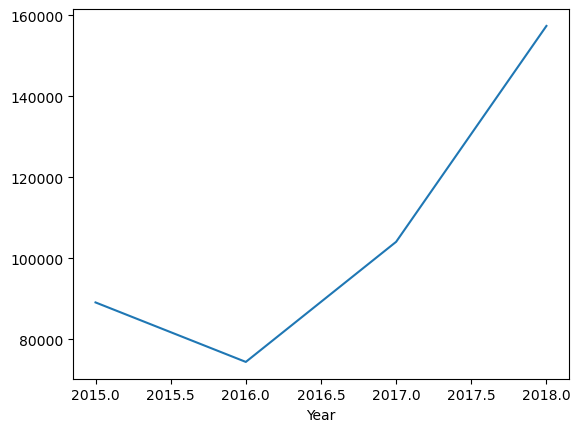

In [52]:
Year_wise_sale_Home_office.plot.line();

In [53]:
Corporate = data.query("Segment == 'Corporate'")
Corporate

,Order_Date,Ship_date,Ship_Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Shipment_Delay_1,Weekday
7859,2015-05-30,2015-01-06,First Class,Corporate,United States,New York City,New York,East,Office Supplies,Paper,Xerox 1948,39.960,144,Friday
7856,2015-05-30,2015-01-06,First Class,Corporate,United States,New York City,New York,East,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",25.584,144,Friday
7858,2015-05-30,2015-01-06,First Class,Corporate,United States,New York City,New York,East,Office Supplies,Appliances,Honeywell Quietcare HEPA Air Cleaner,235.950,144,Friday
7857,2015-05-30,2015-01-06,First Class,Corporate,United States,New York City,New York,East,Technology,Phones,Geemarc AmpliPOWER60,464.000,144,Friday
6422,2015-07-26,2015-01-08,Standard Class,Corporate,United States,Draper,Utah,West,Technology,Accessories,Memorex Micro Travel Drive 16 GB,111.930,199,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,2018-12-28,2019-02-01,Second Class,Corporate,United States,San Francisco,California,West,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,725.840,35,Thursday
1296,2018-12-30,2019-03-01,Standard Class,Corporate,United States,Fairfield,California,West,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,61,Saturday
1297,2018-12-30,2019-03-01,Standard Class,Corporate,United States,Fairfield,California,West,Office Supplies,Binders,GBC Binding covers,20.720,61,Saturday
4239,2018-12-29,2019-04-01,Standard Class,Corporate,United States,Grand Rapids,Michigan,Central,Office Supplies,Paper,Xerox 1915,209.700,93,Friday


In [54]:
Corporate['Year'] = Corporate.Order_Date.dt.year
Corporate.sort_values(by='Year',inplace=True)

In [55]:
Year_wise_purchase_Corporate = Corporate.groupby(['Year'])['Sales'].sum()
Year_wise_purchase_Corporate

Year
2015    127797.4957
2016    119675.5989
2017    204977.3178
2018    236043.6624
Name: Sales, dtype: float64

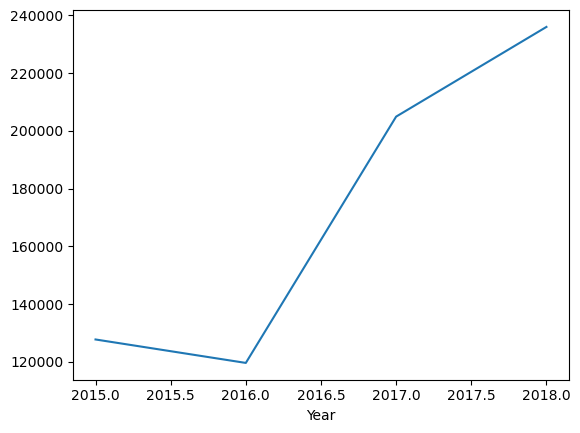

In [56]:
Year_wise_purchase_Corporate.plot.line();

In [57]:
Consumer = data.query("Segment == 'Consumer'")
Consumer

,Order_Date,Ship_date,Ship_Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Shipment_Delay_1,Weekday
2432,2015-03-25,2015-01-04,Standard Class,Consumer,United States,New York City,New York,East,Furniture,Chairs,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",366.786,80,Tuesday
2891,2015-04-29,2015-01-05,Second Class,Consumer,United States,Lake Charles,Louisiana,South,Office Supplies,Binders,Avery Non-Stick Heavy Duty View Round Locking ...,17.940,114,Tuesday
2890,2015-04-29,2015-01-05,Second Class,Consumer,United States,Lake Charles,Louisiana,South,Furniture,Chairs,"Global Stack Chair without Arms, Black",51.960,114,Tuesday
1049,2015-05-27,2015-01-06,Second Class,Consumer,United States,San Francisco,California,West,Technology,Accessories,Logitech Wireless Performance Mouse MX for PC ...,99.990,141,Tuesday
8438,2015-05-28,2015-01-06,Standard Class,Consumer,United States,Seattle,Washington,West,Office Supplies,Binders,"Green Canvas Binder for 8-1/2"" x 14"" Sheets",136.960,142,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,2018-12-30,2019-03-01,Standard Class,Consumer,United States,New York City,New York,East,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136,61,Saturday
572,2018-12-28,2019-04-01,Standard Class,Consumer,United States,New York City,New York,East,Office Supplies,Binders,Storex Dura Pro Binders,33.264,94,Thursday
573,2018-12-28,2019-04-01,Standard Class,Consumer,United States,New York City,New York,East,Technology,Phones,Cush Cases Heavy Duty Rugged Cover Case for Sa...,14.850,94,Thursday
571,2018-12-28,2019-04-01,Standard Class,Consumer,United States,New York City,New York,East,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,13.960,94,Thursday


In [58]:
Consumer['Year'] = Consumer.Order_Date.dt.year
Consumer.sort_values(by='Year',inplace=True)
Year_wise_purchase_Consumer = Consumer.groupby(['Year'])['Sales'].sum()
Year_wise_purchase_Consumer

Year
2015    262956.8006
2016    265356.2933
2017    291142.9652
2018    328604.4719
Name: Sales, dtype: float64

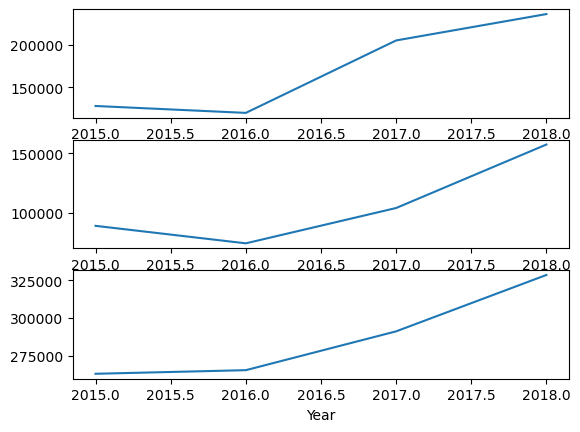

In [59]:
plt.subplot(3,1,1)
Year_wise_purchase_Corporate.plot.line()

plt.subplot(3,1,2)
Year_wise_sale_Home_office.plot.line()

plt.subplot(3,1,3)
Year_wise_purchase_Consumer.plot.line();

###### From this graph, we can find that in 2016 onwards the number of consumers in segments = ['Consumer', 'Home Office', 'Corporate'] incresing after a problematic situation in 2015

In [60]:
data

,Order_Date,Ship_date,Ship_Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Shipment_Delay_1,Weekday
2432,2015-03-25,2015-01-04,Standard Class,Consumer,United States,New York City,New York,East,Furniture,Chairs,"Iceberg Nesting Folding Chair, 19w x 6d x 43h",366.786,80,Tuesday
8463,2015-03-28,2015-01-04,Standard Class,Home Office,United States,Albuquerque,New Mexico,West,Technology,Phones,AT&T TR1909W,302.376,83,Friday
7631,2015-03-30,2015-01-04,First Class,Home Office,United States,Brownsville,Texas,Central,Furniture,Chairs,"Global Stack Chair without Arms, Black",127.302,85,Sunday
7629,2015-03-30,2015-01-04,First Class,Home Office,United States,Brownsville,Texas,Central,Office Supplies,Envelopes,Airmail Envelopes,335.720,85,Sunday
7630,2015-03-30,2015-01-04,First Class,Home Office,United States,Brownsville,Texas,Central,Technology,Phones,Innergie mMini Combo Duo USB Travel Charging Kit,251.944,85,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2018-12-28,2019-04-01,Standard Class,Consumer,United States,New York City,New York,East,Office Supplies,Fasteners,OIC Bulk Pack Metal Binder Clips,13.960,94,Thursday
570,2018-12-28,2019-04-01,Standard Class,Consumer,United States,New York City,New York,East,Office Supplies,Labels,Avery 473,72.450,94,Thursday
4239,2018-12-29,2019-04-01,Standard Class,Corporate,United States,Grand Rapids,Michigan,Central,Office Supplies,Paper,Xerox 1915,209.700,93,Friday
5131,2018-12-29,2019-05-01,Standard Class,Corporate,United States,Anaheim,California,West,Furniture,Furnishings,Nu-Dell Executive Frame,101.120,123,Friday


In [61]:
High_Shipment_Delay = data.query("Shipment_Delay_1 > 260")
High_Shipment_Delay

,Order_Date,Ship_date,Ship_Mode,Segment,Country,City,State,Region,Category,Sub-Category,Product_Name,Sales,Shipment_Delay_1,Weekday
5625,2015-09-29,2015-01-10,Second Class,Home Office,United States,Seattle,Washington,West,Furniture,Furnishings,Longer-Life Soft White Bulbs,6.160,262,Monday
5626,2015-09-29,2015-01-10,Second Class,Home Office,United States,Seattle,Washington,West,Furniture,Tables,"Bevis Oval Conference Table, Walnut",2348.820,262,Monday
9418,2015-10-27,2015-01-11,Standard Class,Home Office,United States,Fayetteville,North Carolina,South,Office Supplies,Paper,Easy-staple paper,11.952,289,Monday
9417,2015-10-27,2015-01-11,Standard Class,Home Office,United States,Fayetteville,North Carolina,South,Office Supplies,Paper,Xerox 2,10.368,289,Monday
7370,2015-10-28,2015-01-11,Standard Class,Corporate,United States,Garden City,Kansas,Central,Technology,Phones,Digium D40 VoIP phone,257.980,290,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7390,2018-11-29,2018-03-12,Standard Class,Consumer,United States,Chattanooga,Tennessee,South,Furniture,Furnishings,"Executive Impressions 13"" Chairman Wall Clock",101.520,262,Wednesday
9288,2018-11-30,2018-03-12,First Class,Consumer,United States,Philadelphia,Pennsylvania,East,Furniture,Chairs,Global Commerce Series Low-Back Swivel/Tilt Ch...,1079.316,263,Thursday
4635,2018-12-03,2018-03-17,Standard Class,Corporate,United States,San Francisco,California,West,Office Supplies,Storage,Carina Double Wide Media Storage Towers in Nat...,242.940,261,Sunday
5386,2018-12-03,2018-03-17,Standard Class,Consumer,United States,Rogers,Arkansas,South,Office Supplies,Binders,Avery Non-Stick Binders,40.410,261,Sunday


In [62]:
df = pd.DataFrame(High_Shipment_Delay.groupby(['Order_Date','Weekday'])['Sales'].sum())

In [63]:
df.reset_index(inplace=True)

In [64]:
df

,Order_Date,Weekday,Sales
0,2015-09-29,Monday,2354.9800
1,2015-10-27,Monday,22.3200
2,2015-10-28,Tuesday,257.9800
3,2015-10-31,Friday,3611.7540
4,2015-11-01,Saturday,9.9400
5,2015-11-26,Wednesday,1291.3600
6,2015-11-27,Thursday,199.9000
7,2015-11-28,Friday,1788.8200
8,2015-12-02,Tuesday,129.5680
9,2016-09-28,Tuesday,86.8200
